### PROJECT GOAL : The goal of this project is to understand why the customers have stopped using the service of the telecom and to create a model that will classify the current customer base to indicate potential customer churn so that necessary action can be taken to retain the customer.

In [155]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [156]:
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn (2).csv


In [157]:
import io
df = pd.read_csv(io.BytesIO(uploaded['WA_Fn-UseC_-Telco-Customer-Churn.csv']))

In [158]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,6823-SIDFQ,Male,0,No,No,28,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),18.25,534.70,No
1,9764-REAFF,Female,0,Yes,No,59,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),18.40,1057.85,No
2,0827-ITJPH,Male,0,No,No,36,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),18.55,689.00,No
3,0621-CXBKL,Female,0,No,No,53,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,18.70,1005.70,No
4,9945-PSVIP,Female,0,Yes,Yes,25,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,18.70,383.65,No


In [159]:
df.shape

(7032, 21)

#### Checking for null values in the dataset

In [160]:
df.isnull().sum().sort_values(ascending = False)

Churn               0
OnlineSecurity      0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineBackup        0
TotalCharges        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
customerID          0
dtype: int64

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [162]:
df['TotalCharges'] = df['TotalCharges'].astype(float)
df = df.drop('customerID', axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,No,No,28,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),18.25,534.70,No
1,Female,0,Yes,No,59,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),18.40,1057.85,No
2,Male,0,No,No,36,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),18.55,689.00,No
3,Female,0,No,No,53,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,18.70,1005.70,No
4,Female,0,Yes,Yes,25,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,18.70,383.65,No


#### Checking how many customers have churned

In [163]:
x = df['Churn'].value_counts()
x = pd.DataFrame(x)
x['%'] = x/len(df)
x

,Churn,%
No,5163,0.734215
Yes,1869,0.265785


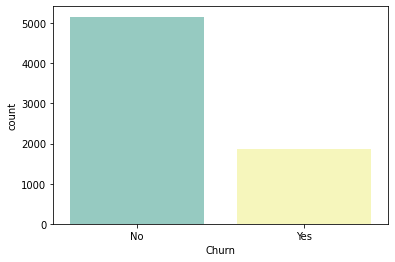

In [164]:
sb.countplot(x = 'Churn', data = df, palette = 'Set3')

#### Have male customers churned more or female customers?

In [165]:
gender_churn = pd.crosstab(index = df['gender'], columns = df['Churn'])
gender_churn

Churn,No,Yes
gender,,
Female,2544,939
Male,2619,930


#### We can see that more or less equal number of customers have churned of each gender. So perhaps gender does not play a role in predicting whether a customer will churn or not

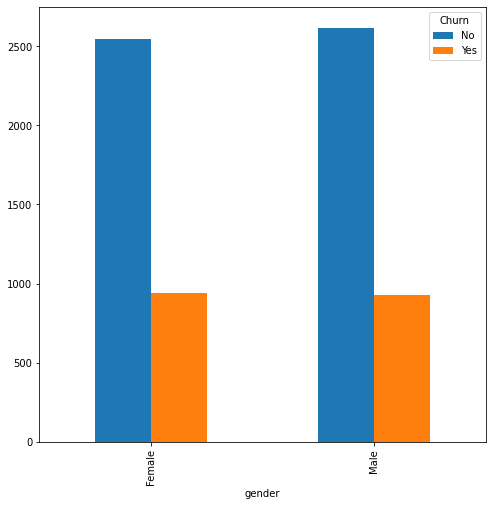

In [166]:
gender_churn.plot(kind = 'bar', figsize = (8,8))

#### Does customers with longer tenure tend to stick to the telco company?

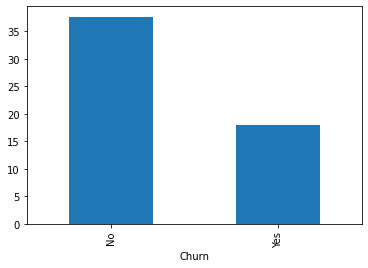

In [167]:
df.groupby('Churn')['tenure'].mean().plot.bar()

#### So we can see that the mean tenure of the customers who churned are less than the mean tenure of the people who did not churn

#### HYPOTHESIS TESTING 1

#### NULL HYPOTHESIS: The mean of tenure of customers who churned is the same as the customers who did not churn.
#### ALTERNATE HYPOTHESIS: The mean of tenure of the customers who churned is different from the customers who did not  churn.

In [168]:
from scipy.stats import ttest_ind

In [169]:
churn_cust = df.loc[df['Churn'] == 'Yes']
not_churn_cust = df.loc[df['Churn']== 'No']

In [170]:
churn_tenure_mean = churn_cust['tenure'].mean()
non_churn_tenure_mean = not_churn_cust['tenure'].mean()
churn_tenure_std = churn_cust['tenure'].std()
non_churn_tenure_std = not_churn_cust['tenure'].std()

In [171]:
ttest, pval = ttest_ind(churn_cust['tenure'], not_churn_cust['tenure'])

In [172]:
pval

9.437650217574845e-207

#### So we can see that the pvalue is less than 0.05 and we can reject the null hypothesis and conclude that the tenure mean for churned customers is different from that of retained customers. 

In [173]:
df.Contract.unique()

array(['One year', 'Two year', 'Month-to-month'], dtype=object)

In [174]:
contract_churn = pd.crosstab(index = df['Contract'], columns = df['Churn'])
contract_churn

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1306,166
Two year,1637,48


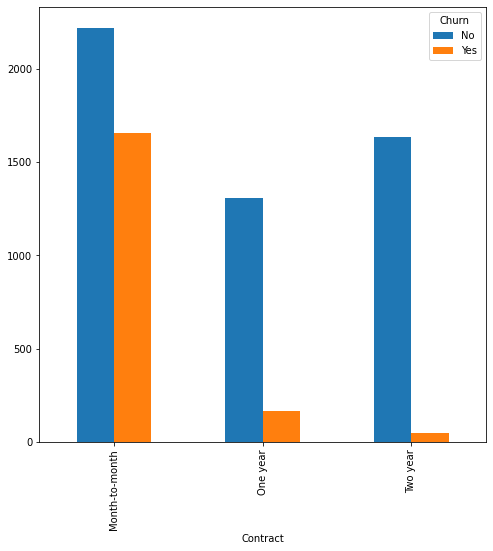

In [175]:
contract_churn.plot(kind = 'bar', figsize = (8,8))

#### We can also verify a previous finding from this graph that the customers having a longer contract with the telecom company tend to stay with the company. So the company should focus on making longer contracts more lucrative in the eyes of the customer

In [176]:
df['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

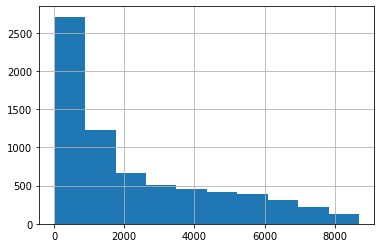

In [177]:
df['TotalCharges'].hist()

#### We can see that the distribution for the total charges is right skewed i.e there are few observations with high values which is pushing the average to be more than the median

In [178]:
df['TotalChargesBucket'] = pd.cut(x = df['TotalCharges'], bins=[0, 800, 2000, 4000, 6000, 8000], labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High'])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalChargesBucket
0,Male,0,No,No,28,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),18.25,534.70,No,Very Low
1,Female,0,Yes,No,59,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),18.40,1057.85,No,Low
2,Male,0,No,No,36,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),18.55,689.00,No,Very Low
3,Female,0,No,No,53,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,18.70,1005.70,No,Low
4,Female,0,Yes,Yes,25,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,18.70,383.65,No,Very Low


In [179]:
charges_churn = pd.crosstab(index = df['TotalChargesBucket'], columns = df['Churn'])
charges_churn

Churn,No,Yes
TotalChargesBucket,,
Very Low,1580,977
Low,1257,362
Medium,921,287
High,801,155
Very High,529,85


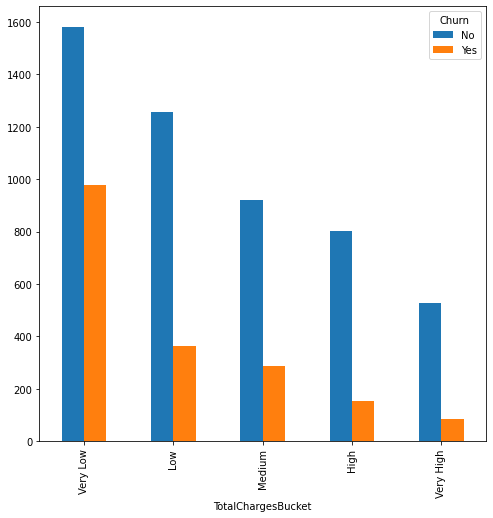

In [180]:
charges_churn.plot(kind = 'bar', figsize = (8,8))

#### We can see that the total charge bucket impacts whether the customer will churn or not

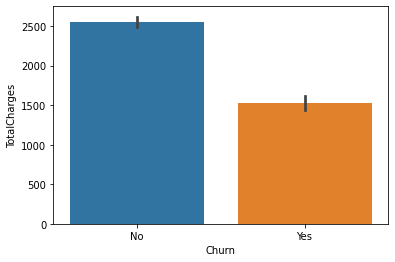

In [181]:
ax = sb.barplot( x = "Churn", y = "TotalCharges", data = df)

#### The people who have a higher total charge churn less compared to the people who have lesser total charge. This can be attributed to the fact that the people with higher charge are using more of the products and are satisfied with it while people who are using less products are churning because they are not satisfied with the products

#### Lets see if the type of billing and payment has an impact on the churn of customers

In [182]:
df.PaperlessBilling.unique()

array(['No', 'Yes'], dtype=object)

In [183]:
df.PaymentMethod.unique()

array(['Credit card (automatic)', 'Bank transfer (automatic)',
       'Mailed check', 'Electronic check'], dtype=object)

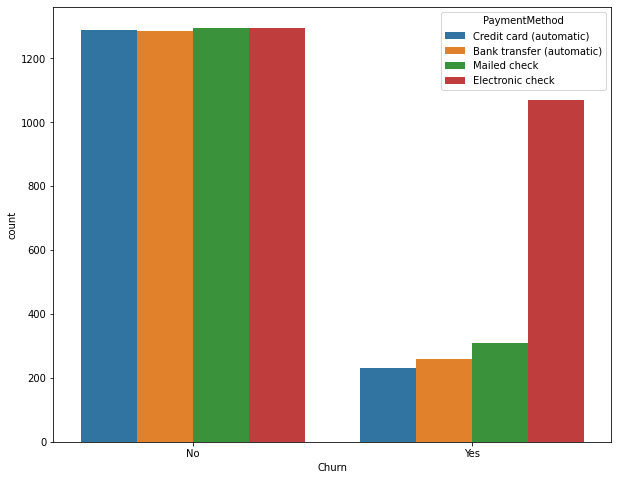

In [184]:
plt.figure(figsize = (10,8))
sb.countplot(x = 'Churn', hue = 'PaymentMethod', data = df)

#### So here we can see that out of the total number of customers the ones who used electronic checks are churning more compared to others.

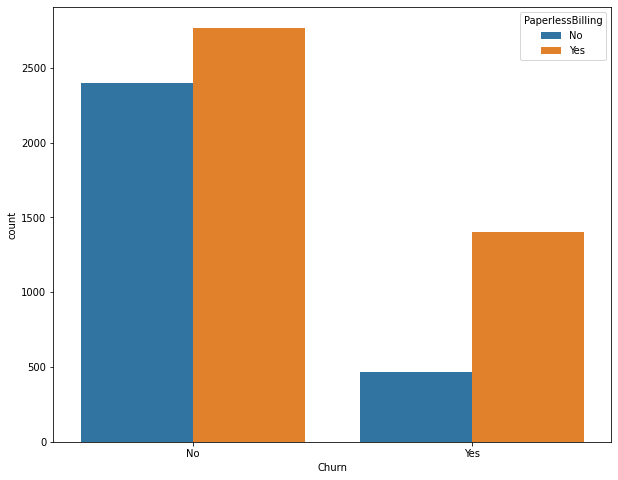

In [185]:
plt.figure(figsize = (10,8))
sb.countplot(x = 'Churn', hue = 'PaperlessBilling', data = df)

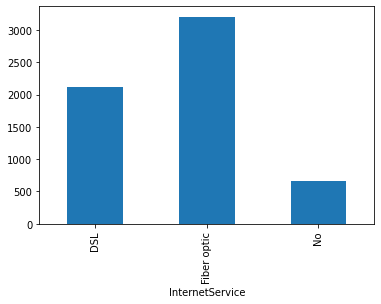

In [186]:
df.groupby(df['InternetService'])['TotalCharges'].mean().plot.bar()

#### We can see that the customers who do not have a net connection are not providing enough revenue to the company. For further analysis the customers who do not have a net connection would be dropped

In [187]:
df = df[df.InternetService != 'No']

In [188]:
df['OnlineSecurity'].unique()

array(['No', 'Yes'], dtype=object)

In [189]:
df['OnlineSecurity'] = [1 if x == 'Yes' else 0 for x in df['OnlineSecurity']] 

In [190]:
df['OnlineSecurity'].unique()

array([0, 1])

In [191]:
df['OnlineBackup'] = [1 if x == 'Yes' else 0 for x in df['OnlineBackup']] 

In [192]:
df['OnlineBackup'].unique()

array([0, 1])

In [193]:
df['DeviceProtection'] = [1 if x == 'Yes' else 0 for x in df['DeviceProtection']] 

In [194]:
df['DeviceProtection'].unique()

array([0, 1])

In [195]:
df['TechSupport'] = [1 if x == 'Yes' else 0 for x in df['TechSupport']] 

In [196]:
df['TechSupport'].unique()

array([0, 1])

In [197]:
df['Support_Count'] = df['OnlineSecurity'] + df['OnlineBackup']  + df['DeviceProtection'] + df['TechSupport']
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalChargesBucket,Support_Count
1186,Male,0,Yes,No,1,No,No phone service,DSL,0,0,0,0,No,No,Month-to-month,Yes,Electronic check,23.45,23.45,Yes,Very Low,0
1200,Female,0,No,No,13,No,No phone service,DSL,0,0,0,0,No,No,Month-to-month,Yes,Electronic check,23.90,300.80,Yes,Very Low,0
1220,Male,0,Yes,No,9,No,No phone service,DSL,0,0,0,0,No,No,One year,No,Bank transfer (automatic),24.10,259.80,Yes,Very Low,0
1226,Female,0,No,No,35,No,No phone service,DSL,0,0,0,0,No,No,Month-to-month,No,Electronic check,24.15,812.50,No,Low,0
1235,Male,0,No,Yes,1,No,No phone service,DSL,0,0,0,0,No,No,Month-to-month,No,Mailed check,24.20,24.20,No,Very Low,0


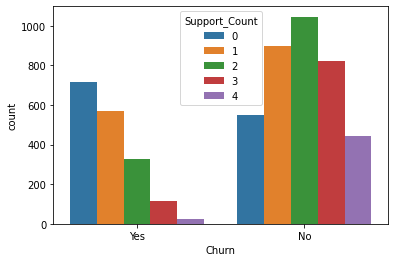

In [198]:
sb.countplot(x = 'Churn', hue = 'Support_Count', data = df)

#### Here we can see that the more support the user subscribes to of the telecom company the more likely he is to stick to the telecomm company. We can see that customers are using pairs of support systems. 

In [199]:
df['StreamingTV'] = [1 if x == 'Yes' else 0 for x in df['StreamingTV']]
df['StreamingTV'].unique()

array([0, 1])

In [200]:
df['StreamingMovies'] = [1 if x == 'Yes' else 0 for x in df['StreamingMovies']]
df['StreamingMovies'].unique()

array([0, 1])

In [201]:
df['Stream_Count'] = df['StreamingTV'] + df['StreamingMovies']
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalChargesBucket,Support_Count,Stream_Count
1186,Male,0,Yes,No,1,No,No phone service,DSL,0,0,0,0,0,0,Month-to-month,Yes,Electronic check,23.45,23.45,Yes,Very Low,0,0
1200,Female,0,No,No,13,No,No phone service,DSL,0,0,0,0,0,0,Month-to-month,Yes,Electronic check,23.90,300.80,Yes,Very Low,0,0
1220,Male,0,Yes,No,9,No,No phone service,DSL,0,0,0,0,0,0,One year,No,Bank transfer (automatic),24.10,259.80,Yes,Very Low,0,0
1226,Female,0,No,No,35,No,No phone service,DSL,0,0,0,0,0,0,Month-to-month,No,Electronic check,24.15,812.50,No,Low,0,0
1235,Male,0,No,Yes,1,No,No phone service,DSL,0,0,0,0,0,0,Month-to-month,No,Mailed check,24.20,24.20,No,Very Low,0,0


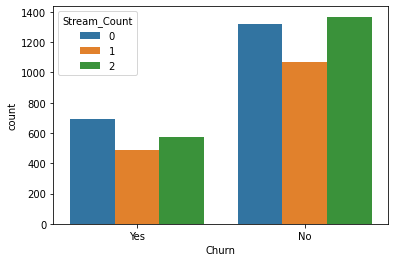

In [202]:
sb.countplot(x = 'Churn', hue = 'Stream_Count', data = df)

#### Here we can see that customers who do not stream either tv or movies have a higher tendency of churning

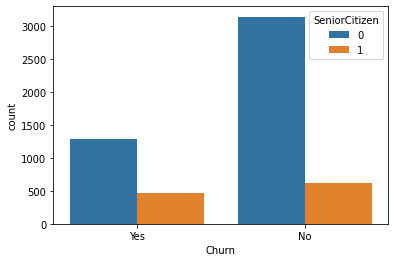

In [203]:
sb.countplot(x = 'Churn', hue = 'SeniorCitizen', data = df)

#### Customers who are not senior citizens are churning more

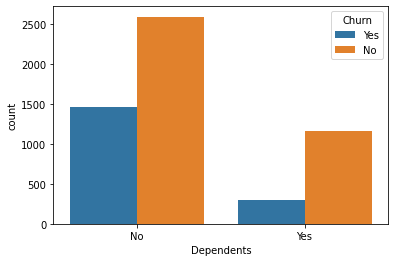

In [204]:
sb.countplot(x = 'Dependents', hue = 'Churn', data = df)

#### This plot shows us that customers who are not dependents are more likely to churn compared to customers who are dependent. This is understandable if the customers are financially independent and cannot afford the price set by the telco company.

#### Lets see how much the non phone service users contribute

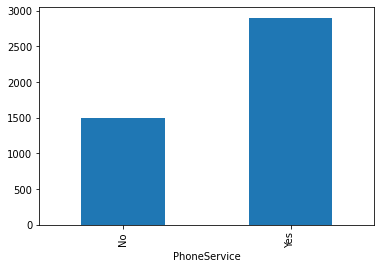

In [205]:
df.groupby(df['PhoneService'])['TotalCharges'].mean().plot.bar()

In [206]:
two_support_systems = df[df['Support_Count'] == 2]
two_support_systems.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalChargesBucket,Support_Count,Stream_Count
1684,Female,0,Yes,Yes,12,No,No phone service,DSL,1,0,0,1,0,0,One year,No,Credit card (automatic),33.15,444.75,No,Very Low,2,0
1685,Female,0,No,No,35,No,No phone service,DSL,0,0,1,1,0,0,Month-to-month,Yes,Mailed check,33.45,1175.85,No,Low,2,0
1686,Female,1,No,No,43,No,No phone service,DSL,1,1,0,0,0,0,Month-to-month,Yes,Credit card (automatic),33.45,1500.25,No,Low,2,0
1687,Male,0,No,No,18,No,No phone service,DSL,0,1,1,0,0,0,Month-to-month,Yes,Credit card (automatic),33.50,600.00,Yes,Very Low,2,0
1688,Female,0,Yes,No,42,No,No phone service,DSL,0,1,0,1,0,0,One year,No,Mailed check,33.55,1445.30,Yes,Low,2,0


In [207]:
os_pairs = ['OnlineBackup', 'DeviceProtection','TechSupport']

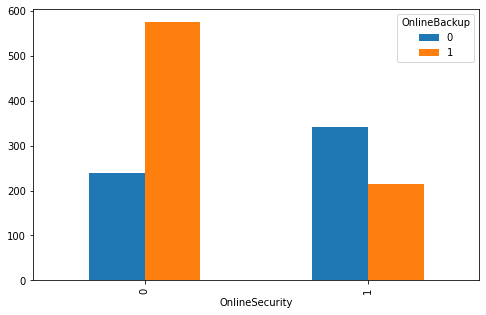

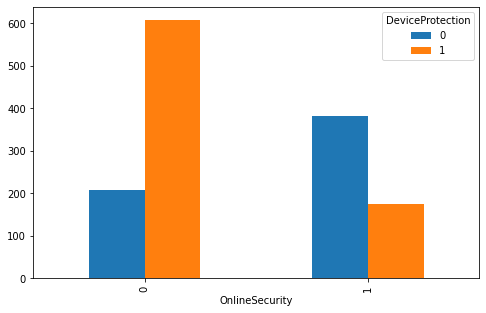

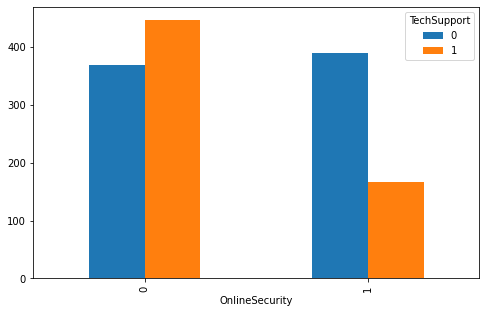

In [208]:
for i in os_pairs:
    
    pair = pd.crosstab(index = two_support_systems['OnlineSecurity'], columns = two_support_systems[i])
    pair.plot(kind = 'bar', figsize = (8,5))

In [209]:
ob_pairs = ['DeviceProtection','TechSupport']

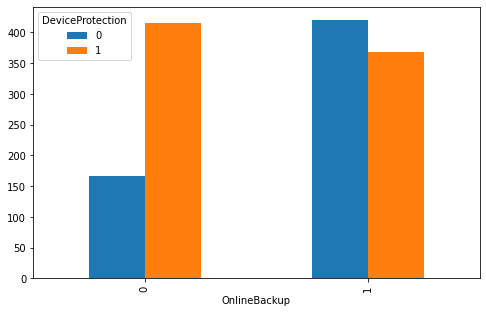

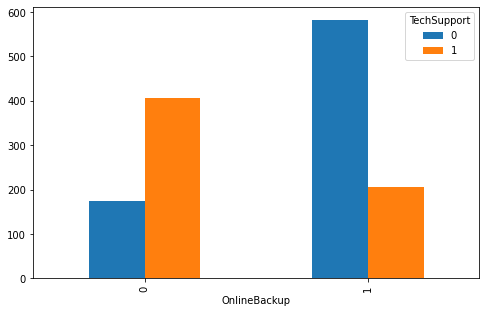

In [210]:
for i in ob_pairs:
    
    pair = pd.crosstab(index = two_support_systems['OnlineBackup'], columns = two_support_systems[i])
    pair.plot(kind = 'bar', figsize = (8,5))

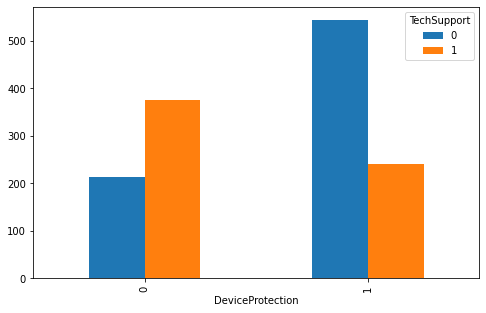

In [211]:
pair = pd.crosstab(index = two_support_systems['DeviceProtection'], columns = two_support_systems['TechSupport'])
pair.plot(kind = 'bar', figsize = (8,5))

#### The point of the above graphs is to understand that out of the people who took 2 support systems which pairs were the most popular among the customers. This is because out of the people who did not churn customers who were using pairs of support systems had the highest frequency. Online Backup and Device Protection turned out to be the most frequently bought pair of support sytems by the customers.

In [212]:
only_movies = df[(df['StreamingMovies'] == 1) & (df['StreamingTV'] == 0)]
only_tv= df[(df['StreamingTV'] == 1) & (df['StreamingMovies'] == 0)]

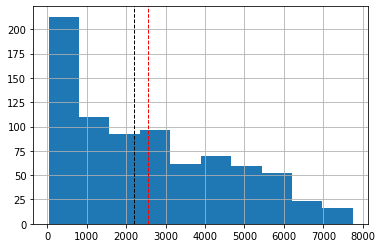

In [213]:
only_movies['TotalCharges'].hist()
plt.axvline(only_movies['TotalCharges'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(only_movies['TotalCharges'].median(), color='black', linestyle='dashed', linewidth=1)

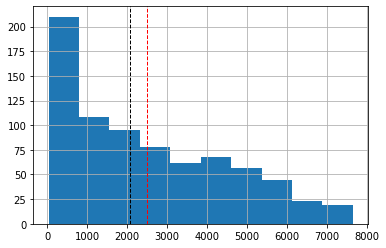

In [214]:
only_tv['TotalCharges'].hist()
plt.axvline(only_tv['TotalCharges'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(only_tv['TotalCharges'].median(), color='black', linestyle='dashed', linewidth=1)

The plots were used to find whether there is a significant difference in the total charges between customers who only streamed
movies versus customers who only streamed tv shows. The plots show that there is not much significant differennce.

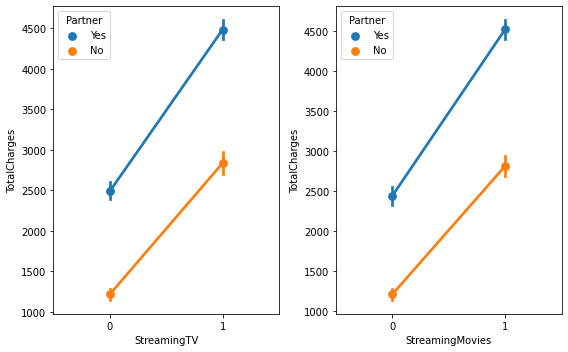

In [215]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8,5))
sb.pointplot(x = 'StreamingTV', y = 'TotalCharges', hue = 'Partner', data = df, ax = ax[0])
sb.pointplot(x = 'StreamingMovies', y = 'TotalCharges', hue = 'Partner', data = df, ax = ax[1])
fig.tight_layout()

#### When customers have partners the revenue to the company is considerably higher. We can see that partners provide more revenue by streaming more movies and tv shows compared to single customers.

### Findings from EDA:

1. Since the customers who do not use internet service provide very little revenue to the company, they were excluded from 
   the analysis.
    
2. Out of a total of 5512 customers 1756 which is 31.85% have churned
3. We found out gender does not play a role in predicting whether a customer will churn or not because more or less equal 
   number of customers have churned of each gender. 
    
4. Customers who have a longer tenure with the company churned less compared to customers with lesser tenure. Similar resutls
   were found with the length of contracts.
    
5. Customers who spend less are more likely to churn compared to customers who spend more. This can be attributed to the
   spending ability of the customer and how many products the customer is using.
    
6. Customers who use electronic checks and paperless billing churn more compared to others.

7. We found out that more support the user subscribes to of the telecom company the more likely he is to stick to the
   telecomm company.
    
8. Customers who are independent are more likely to churn. This can be attributed to the financial stability of the customer.

9. Online Backup and Device Protection turned out to be the most frequently bought support sytems by the customers.

10. There is not much significant difference in total charges between customers who only watched tv versus customers who only
    watched movies.
    
11. More revenue is obtained from partners compared to single customers.

In [216]:
data = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn']]

In [217]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1186,Male,0,Yes,No,1,No,No phone service,DSL,0,0,0,0,0,0,Month-to-month,Yes,Electronic check,23.45,23.45,Yes
1200,Female,0,No,No,13,No,No phone service,DSL,0,0,0,0,0,0,Month-to-month,Yes,Electronic check,23.90,300.80,Yes
1220,Male,0,Yes,No,9,No,No phone service,DSL,0,0,0,0,0,0,One year,No,Bank transfer (automatic),24.10,259.80,Yes
1226,Female,0,No,No,35,No,No phone service,DSL,0,0,0,0,0,0,Month-to-month,No,Electronic check,24.15,812.50,No
1235,Male,0,No,Yes,1,No,No phone service,DSL,0,0,0,0,0,0,Month-to-month,No,Mailed check,24.20,24.20,No


In [218]:
data['Churn'].loc[(df['Churn'] == 'Yes')] = 1
data['Churn'].loc[(df['Churn'] == 'No')] = 0
data.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1186,Male,0,Yes,No,1,No,No phone service,DSL,0,0,0,0,0,0,Month-to-month,Yes,Electronic check,23.45,23.45,1
1200,Female,0,No,No,13,No,No phone service,DSL,0,0,0,0,0,0,Month-to-month,Yes,Electronic check,23.90,300.80,1
1220,Male,0,Yes,No,9,No,No phone service,DSL,0,0,0,0,0,0,One year,No,Bank transfer (automatic),24.10,259.80,1
1226,Female,0,No,No,35,No,No phone service,DSL,0,0,0,0,0,0,Month-to-month,No,Electronic check,24.15,812.50,0
1235,Male,0,No,Yes,1,No,No phone service,DSL,0,0,0,0,0,0,Month-to-month,No,Mailed check,24.20,24.20,0


In [219]:
data['gender'] = data['gender'].map(lambda s :1  if s =='Yes' else 0)
data['Partner'] = data['Partner'].map(lambda s :1  if s =='Yes' else 0)
data['Dependents'] = data['Dependents'].map(lambda s :1  if s =='Yes' else 0)
data['PhoneService'] = data['PhoneService'].map(lambda s :1  if s =='Yes' else 0)
data['MultipleLines'] = data['MultipleLines'].map(lambda s :1  if s =='Yes' else 0)
data['InternetService'] = data['InternetService'].map(lambda s :1  if s =='DSL' else 0)
data['PaperlessBilling'] = data['PaperlessBilling'].map(lambda s :1  if s =='Yes' else 0)
data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1186,0,0,1,0,1,0,0,1,0,0,0,0,0,0,Month-to-month,1,Electronic check,23.45,23.45,1
1200,0,0,0,0,13,0,0,1,0,0,0,0,0,0,Month-to-month,1,Electronic check,23.90,300.80,1
1220,0,0,1,0,9,0,0,1,0,0,0,0,0,0,One year,0,Bank transfer (automatic),24.10,259.80,1
1226,0,0,0,0,35,0,0,1,0,0,0,0,0,0,Month-to-month,0,Electronic check,24.15,812.50,0
1235,0,0,0,1,1,0,0,1,0,0,0,0,0,0,Month-to-month,0,Mailed check,24.20,24.20,0


#### Creating the dummy variables

In [220]:
data = pd.get_dummies(data = data, columns = ['Contract'])
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year
1186,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,Electronic check,23.45,23.45,1,1,0,0
1200,0,0,0,0,13,0,0,1,0,0,0,0,0,0,1,Electronic check,23.90,300.80,1,1,0,0
1220,0,0,1,0,9,0,0,1,0,0,0,0,0,0,0,Bank transfer (automatic),24.10,259.80,1,0,1,0
1226,0,0,0,0,35,0,0,1,0,0,0,0,0,0,0,Electronic check,24.15,812.50,0,1,0,0
1235,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,Mailed check,24.20,24.20,0,1,0,0


In [221]:
data = pd.get_dummies(data = data, columns = ['PaymentMethod'])
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1186,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,23.45,23.45,1,1,0,0,0,0,1,0
1200,0,0,0,0,13,0,0,1,0,0,0,0,0,0,1,23.90,300.80,1,1,0,0,0,0,1,0
1220,0,0,1,0,9,0,0,1,0,0,0,0,0,0,0,24.10,259.80,1,0,1,0,1,0,0,0
1226,0,0,0,0,35,0,0,1,0,0,0,0,0,0,0,24.15,812.50,0,1,0,0,0,0,1,0
1235,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,24.20,24.20,0,1,0,0,0,0,0,1


In [222]:
X = data.drop(['Churn','gender'], axis = 1)
y = data['Churn']
y = y.astype('int')

In [223]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [224]:
X_train.shape

(4409, 23)

In [225]:
y_train.shape

(4409,)

In [226]:
X_test.shape

(1103, 23)

In [227]:
y_test.shape

(1103,)

In [228]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler(feature_range = (0,1))
X_train = minmax.fit_transform(X_train)

In [229]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler(feature_range = (0,1))
X_test = minmax.fit_transform(X_test)

### Applying the logistic regression model on the dataset

In [230]:
from sklearn.linear_model import LogisticRegression

In [231]:
lr = LogisticRegression()

In [232]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [233]:
train_pred_lr = lr.predict(X_train)
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_train, train_pred_lr)
cm

array([[2594,  409],
       [ 589,  817]])

In [234]:
print(classification_report(y_train, train_pred_lr))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84      3003
           1       0.67      0.58      0.62      1406

    accuracy                           0.77      4409
   macro avg       0.74      0.72      0.73      4409
weighted avg       0.77      0.77      0.77      4409



In [235]:
y_pred_lr = lr.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred_lr)
cm

array([[650, 103],
       [152, 198]])

In [236]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       753
           1       0.66      0.57      0.61       350

    accuracy                           0.77      1103
   macro avg       0.73      0.71      0.72      1103
weighted avg       0.76      0.77      0.76      1103



In [237]:
imp = pd.DataFrame(lr.coef_[0], index = X.columns.values, columns = ['Importance'])
imp.sort_values(ascending = False, by = 'Importance')

,Importance
TotalCharges,1.003731
Contract_Month-to-month,0.628750
PaperlessBilling,0.362359
MultipleLines,0.320962
SeniorCitizen,0.251268
PaymentMethod_Electronic check,0.232042
StreamingTV,0.199765
StreamingMovies,0.198960
Contract_One year,0.047426
Partner,0.012792


#### We can see how certain inferences from eda are being repeated here. The increase in tenure and contract results in decrease in churn. 

#### Using GridSearch to optimize the parameters of the model

In [238]:
from sklearn.model_selection import GridSearchCV

C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

solver = ['newton-cg', 'lbfgs','sag','liblinear', 'saga']

param_grid = dict(C = C, solver = solver)

grid = GridSearchCV(estimator = lr, param_grid = param_grid, scoring = 'accuracy', verbose = 1, n_jobs = -1)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    7.0s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'liblinear',
                                    'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [239]:
grid.best_score_

0.7725116531667529

In [240]:
grid.best_params_

{'C': 1000, 'solver': 'newton-cg'}

In [241]:
y_pred_lr_grid = grid.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred_lr_grid)
cm

array([[655,  98],
       [150, 200]])

In [242]:
print(classification_report(y_test, y_pred_lr_grid))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       753
           1       0.67      0.57      0.62       350

    accuracy                           0.78      1103
   macro avg       0.74      0.72      0.73      1103
weighted avg       0.77      0.78      0.77      1103



#### The best accuracy for the logistic regression model on the test set is 77%

### Applying K Nearest Neighbors to our dataset

In [243]:
from sklearn.neighbors import KNeighborsClassifier

In [244]:
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [245]:
parameters = [{ 'n_neighbors' : list(range(1,100)),
                'weights' : ['uniform', 'distance'],
                'algorithm' : ['ball_tree','kd_tree','brute'],
                'metric' : ['euclidean','manhattan']}]

In [246]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(knn, parameters, cv = 10, verbose = 1, n_jobs = -1, scoring = 'accuracy')

In [247]:
grid.fit(X_train, y_train)

Fitting 10 folds for each of 1188 candidates, totalling 11880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done 888 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1588 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 2488 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 3588 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 4888 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 6388 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 8212 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 11880 out of 11880 | elapsed: 13.7min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=4, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'metric': ['euclidean', 'manhattan'],
                          'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...],
                          'weights': ['uniform', 'distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [248]:
grid.best_score_

0.7561837765409194

In [249]:
grid.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=96, p=2,
                     weights='uniform')

In [250]:
grid.best_params_

{'algorithm': 'ball_tree',
 'metric': 'manhattan',
 'n_neighbors': 96,
 'weights': 'uniform'}

#### Using the optimal hyperparamters to run the model

In [251]:
y_pred_knn_grid = grid.predict(X_test)
print(confusion_matrix(y_test, y_pred_knn_grid))
print(classification_report(y_test, y_pred_knn_grid))

[[633 120]
 [134 216]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       753
           1       0.64      0.62      0.63       350

    accuracy                           0.77      1103
   macro avg       0.73      0.73      0.73      1103
weighted avg       0.77      0.77      0.77      1103



#### The Knn model predicted with an accuracy of 75% on the test set

#### Applying support vector machines to our dataset

In [252]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [253]:
from sklearn.metrics import confusion_matrix, classification_report
train_pred_svc = svc.predict(X_train)
print(confusion_matrix(y_train, train_pred_svc))
print(classification_report(y_train, train_pred_svc))

[[2663  340]
 [ 609  797]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      3003
           1       0.70      0.57      0.63      1406

    accuracy                           0.78      4409
   macro avg       0.76      0.73      0.74      4409
weighted avg       0.78      0.78      0.78      4409



In [254]:
y_pred_svc = svc.predict(X_test)
print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

[[665  88]
 [171 179]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       753
           1       0.67      0.51      0.58       350

    accuracy                           0.77      1103
   macro avg       0.73      0.70      0.71      1103
weighted avg       0.76      0.77      0.76      1103



#### Optimizing the parameters of a support vector machine model

In [255]:
parameters = [{'C': [100, 500, 1000],
               'kernel': ['linear']}]

In [256]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(svc, parameters, cv = 10, verbose = 1, n_jobs = -1, scoring = 'accuracy')

In [257]:
grid.fit(X_train,y_train)

Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  6.0min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [100, 500, 1000], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [258]:
grid.best_score_

0.7686590393733251

In [259]:
grid.best_estimator_

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [260]:
grid.best_params_

{'C': 100, 'kernel': 'linear'}

In [261]:
y_pred_svc_grid = grid.predict(X_test)
print(confusion_matrix(y_test, y_pred_svc_grid))
print(classification_report(y_test, y_pred_svc_grid))

[[645 108]
 [148 202]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       753
           1       0.65      0.58      0.61       350

    accuracy                           0.77      1103
   macro avg       0.73      0.72      0.72      1103
weighted avg       0.76      0.77      0.76      1103



The accuracy on the test set for the support vector machine is 77%

### Applying Decision Tree Classifier to the dataset

In [284]:
from sklearn.tree import DecisionTreeClassifier
dt =  DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [285]:
dt.feature_importances_

array([0.01790969, 0.01890787, 0.01517339, 0.14299883, 0.00262377,
       0.0141654 , 0.04117849, 0.02020853, 0.01611802, 0.01379989,
       0.01386278, 0.01083883, 0.0079227 , 0.01586508, 0.21581339,
       0.21349835, 0.1585224 , 0.        , 0.00445791, 0.01150955,
       0.01221649, 0.0147844 , 0.01762424])

In [286]:
feature_col = []
feature_imp = []

for i,v in enumerate(X):
    feature_col.append(X.columns[i])
    feature_imp.append(dt.feature_importances_[i])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]), <a list of 23 Text major ticklabel objects>)

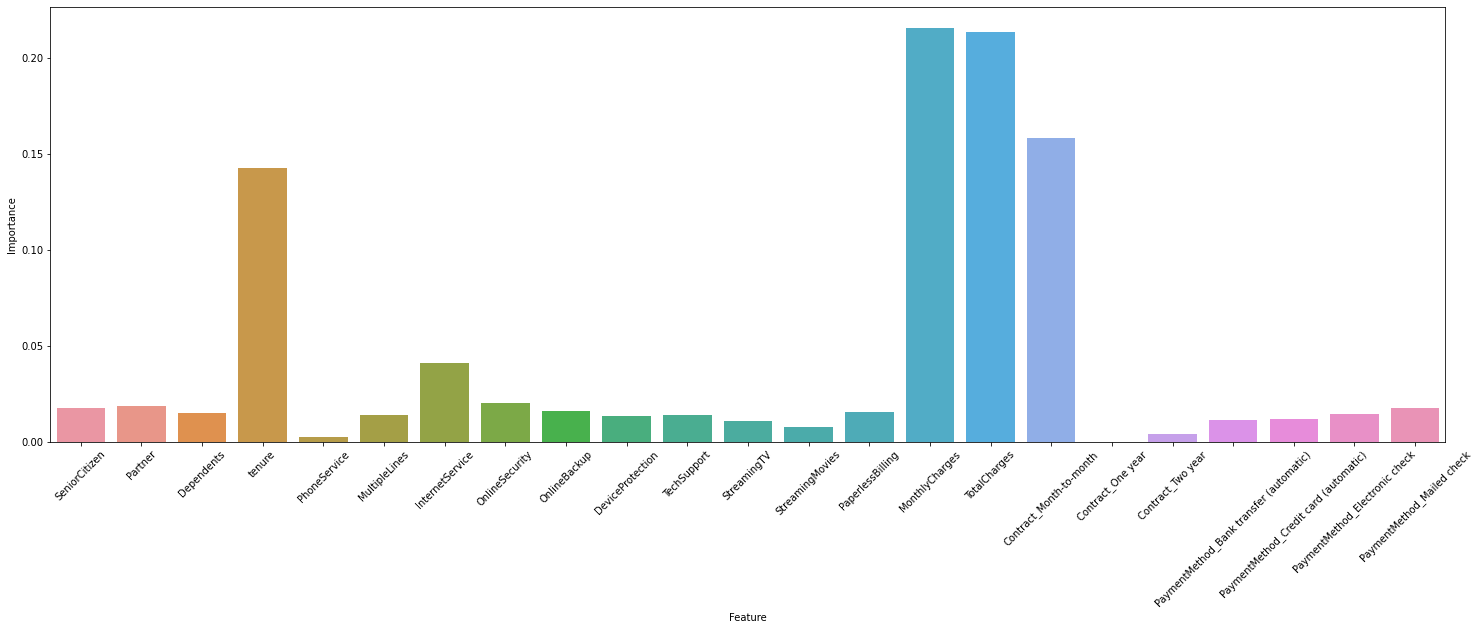

In [287]:
imp = zip(feature_col, feature_imp)
imp = pd.DataFrame(imp, columns = ['Feature','Importance'])
plt.figure(figsize = (25,8))
sb.barplot( x = 'Feature', y = 'Importance', data = imp )
plt.xticks(rotation = 45 )

We can see the most important features are monthly charges, total charges, contract length and tenure

In [288]:
y_pred = dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[562, 191],
       [168, 182]])

In [289]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       753
           1       0.49      0.52      0.50       350

    accuracy                           0.67      1103
   macro avg       0.63      0.63      0.63      1103
weighted avg       0.68      0.67      0.68      1103



In [290]:
param_grid = [{ 'criterion' : ['gini', 'entropy'],
                'splitter' : ['best', 'random'],
              }]

In [291]:
grid = GridSearchCV(dt, param_grid = param_grid, cv = 10, verbose = 1, n_jobs = -1, scoring = 'accuracy')
grid.fit(X_train, y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    1.8s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy'],
                   

In [292]:
grid.best_params_

{'criterion': 'entropy', 'splitter': 'random'}

In [293]:
y_pred = grid.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[574, 179],
       [172, 178]])

In [294]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.76      0.77       753
           1       0.50      0.51      0.50       350

    accuracy                           0.68      1103
   macro avg       0.63      0.64      0.63      1103
weighted avg       0.68      0.68      0.68      1103



The decision tree predicted with an accuracy of 68% on the test set




### Applying Random Forrest Classifier to the dataset

In [274]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [275]:
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[656,  97],
       [161, 189]])

In [276]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.84       753
           1       0.66      0.54      0.59       350

    accuracy                           0.77      1103
   macro avg       0.73      0.71      0.72      1103
weighted avg       0.76      0.77      0.76      1103



In [277]:
parameters = [{'n_estimators': [200, 500, 800, 1100, 1400, 1700, 1800],
              'criterion' :['gini', 'entropy']}]
grid = GridSearchCV(estimator = rf, param_grid = parameters, cv = 10, verbose = 1,  n_jobs = -1)

In [278]:
grid.fit(X_train, y_train)

Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed: 10.6min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [279]:
y_pred = grid.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[659,  94],
       [154, 196]])

In [280]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       753
           1       0.68      0.56      0.61       350

    accuracy                           0.78      1103
   macro avg       0.74      0.72      0.73      1103
weighted avg       0.77      0.78      0.77      1103



In [295]:
model_accuracies = [['Logistic Regression', 77], ['K Nearest Neighbors', 75], ['Support Vector Machines', 77], ['Decision Trees', 68], ['Random Forest', 78]] 
best_model = pd.DataFrame(model_accuracies, columns = ['Model', 'Accuracies'])
best_model

,Model,Accuracies
0,Logistic Regression,77
1,K Nearest Neighbors,75
2,Support Vector Machines,77
3,Decision Trees,68
4,Random Forest,78


### The Random Forest was the best predictor of the customer churn with an accuracy of 78% on the test set